# OpenCV Image Processing Showcase

This notebook demonstrates the power of **OpenCV** for computer vision tasks.  
We explore fundamental and advanced image processing techniques with step-by-step examples, explanations, and visual comparisons.  

# What one can learn:
1. Image basics: color spaces, resizing, rotation, flipping  
2. Drawing shapes and text on images  
3. Blurring, filtering, edge detection, and thresholding  
4. Morphological operations (erosion, dilation, contours)  
5. Feature detection using ORB  
6. Object segmentation with GrabCut  
7. Face detection using Haar Cascades  
8. Real-time video effects and live face/eye detection  

Each section explains **what the method does, why it’s useful, and where it’s applied in real-world scenarios**.  

# This project can serve as:
- A **learning resource** for computer vision fundamentals  
- A **portfolio project** to showcase one's OpenCV skills  
- A **starter kit** for more advanced AI/ML applications in vision  

 **Dataset**: Small curated sample images from COCO dataset and internet


## Load Curated Sample Images

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def show_images_in_grid(images: list = None,
                        titles: list = None,
                        cols: int = 2,
                        figsize = (10, 12)
                       ):
    """
    Function to display images in a grid.

    Parameters:
    - images: list of images (numpy arrays in RGB format).
    - titles: list of titles (optional, same length as images).
    - cols: number of columns in the grid (default: 2).
    - figsize: size of the entire figure.
    """
    n_images = len(images)
    rows = (n_images + cols - 1) // cols  # ceiling division for rows

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, img in enumerate(images):
        if len(img.shape) == 2:  # grayscale
            axes[i].imshow(img, cmap="gray")
        else:
            axes[i].imshow(img)
        
        if titles:
            axes[i].set_title(titles[i], fontsize=10)
        axes[i].axis("off")

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

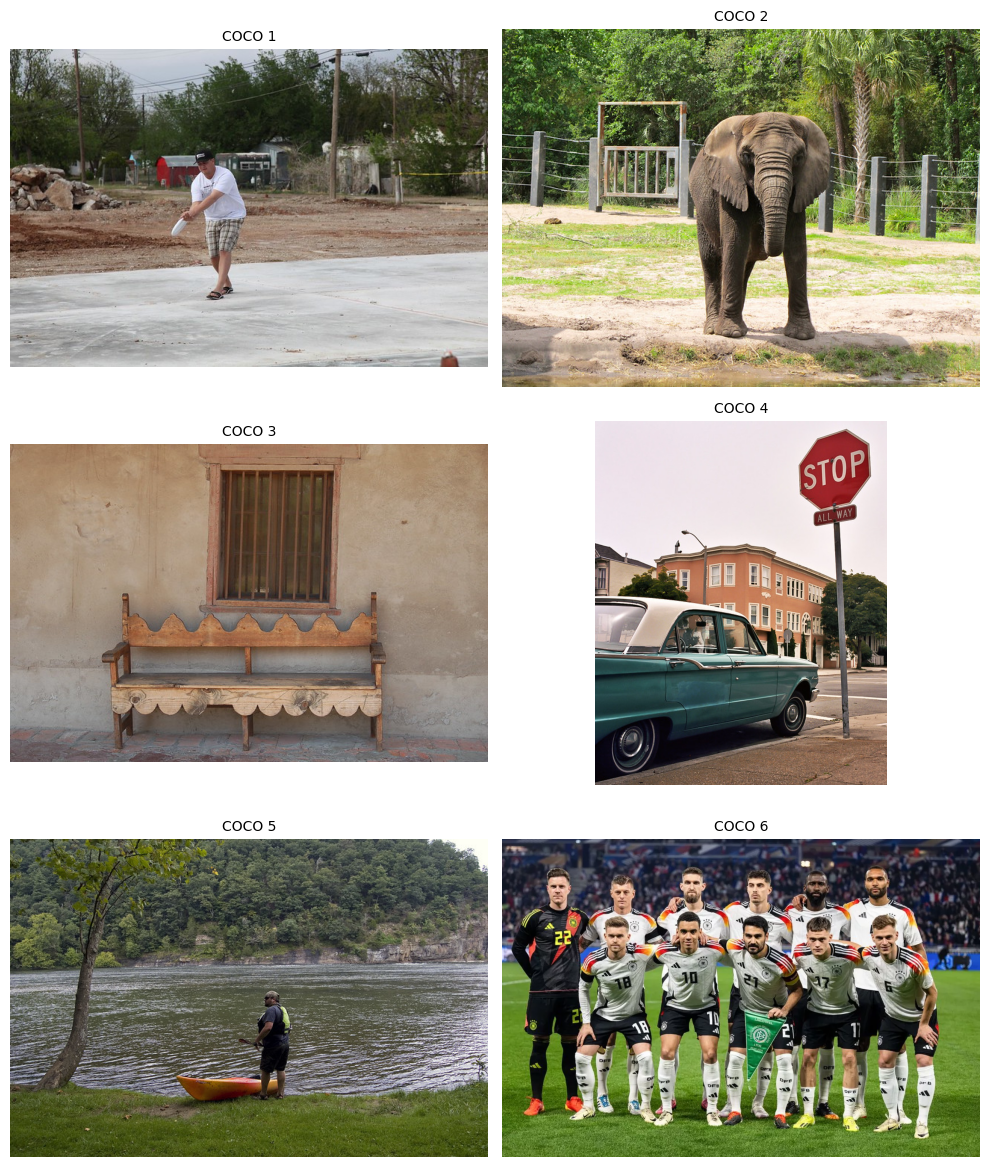

In [2]:
import cv2

images = []
titles = []

for i in range(1, 7):
    img = cv2.imread(f"sample_dataset/coco_{i}.jpg")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)
    titles.append(f"COCO {i}")

show_images_in_grid(images, titles)

## 1. Image Basics

This section introduces some of the most common image transformations in OpenCV:

- **Grayscale Conversion** → simplifies images into a single intensity channel.  
- **HSV Conversion** → separates color (Hue), saturation, and brightness (Value), useful for color-based filtering.  
- **Resize** → resizes the image to fixed dimensions (often required for ML models).  
- **Rotation** → rotates the image around a chosen point.  
- **Flipping** → creates mirrored versions of the image (horizontal/vertical).  

 **Applications**: preprocessing, data augmentation, normalization for ML, and display adjustments.



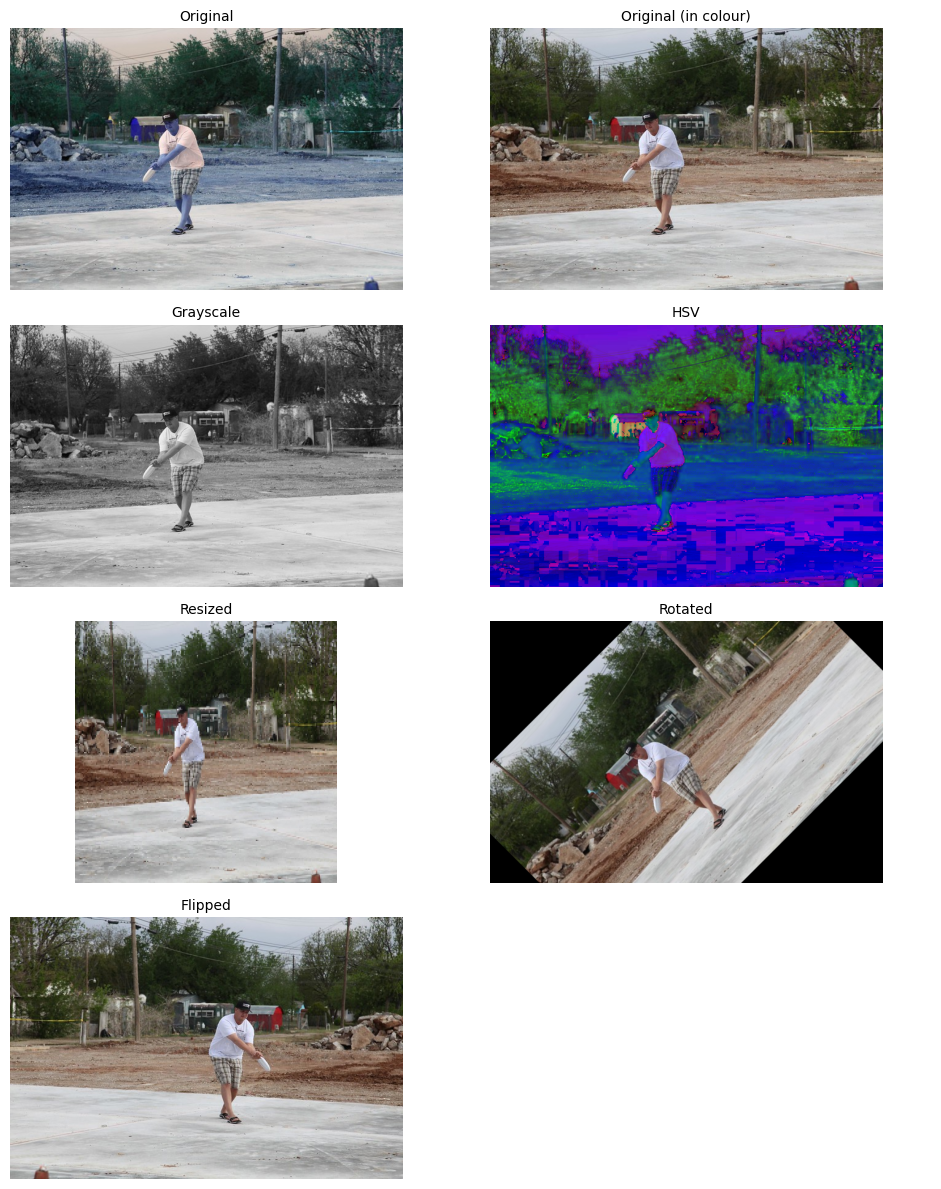

In [3]:
# Loading coco_1 image for this showcase
img = cv2.imread("sample_dataset/coco_1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Resize
resized = cv2.resize(img_rgb, (200, 200))

# Rotation
(h, w) = img_rgb.shape[:2]
M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1.0)
rotated = cv2.warpAffine(img_rgb, M, (w, h))

# Flip
flipped = cv2.flip(img_rgb, 1)  # 1=horizontal

show_images_in_grid(
    [img, img_rgb, gray, hsv, resized, rotated, flipped],
    ["Original", "Original (in colour)", "Grayscale", "HSV", "Resized", "Rotated", "Flipped"]
)

## 2. Drawing & Shapes

OpenCV allows you to draw basic shapes directly on an image or blank canvas:

- **Lines, Rectangles, Circles** → useful for annotations.  
- **Text Overlay** → adding labels or notes.  
- **Frames/Borders** → highlight regions of interest.  

**Applications**: annotating detections, creating masks, highlighting features, or making simple GUIs.

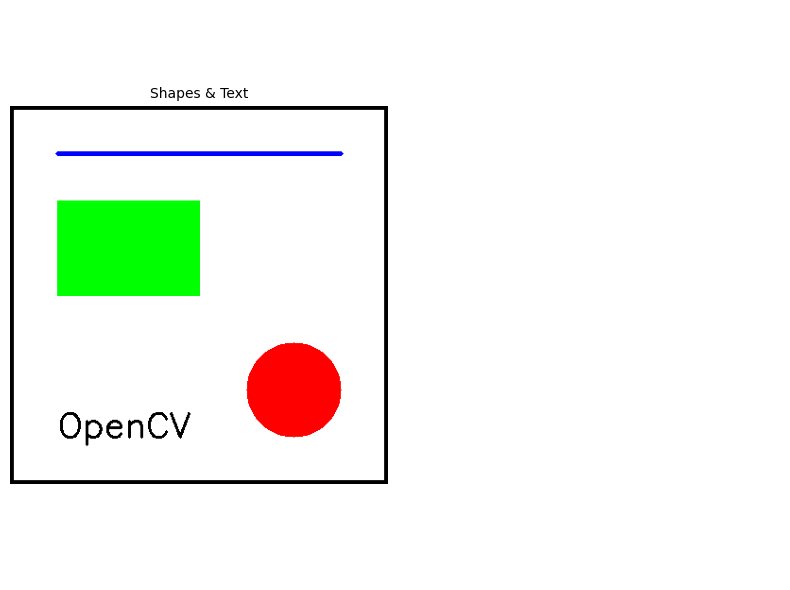

In [4]:
# White canvas
canvas = np.ones((400, 400, 3), dtype="uint8") * 255

# Draw a frame (black border)
cv2.rectangle(canvas, (0, 0), (399, 399), (0, 0, 0), 5)

# Line
cv2.line(canvas, (50, 50), (350, 50), (255, 0, 0), 3)

# Rectangle
cv2.rectangle(canvas, (50, 100), (200, 200), (0, 255, 0), -1)

# Circle
cv2.circle(canvas, (300, 300), 50, (0, 0, 255), -1)

# Text
cv2.putText(canvas, "OpenCV", (50, 350),
            cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,0,0), 2)

show_images_in_grid(
    [cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)], ["Shapes & Text"], figsize= (8,6)
)

## 3. Filtering & Transformations

Filters allow us to reduce noise or emphasize important features:

- **Gaussian Blur** → smooths the image using a weighted average, reduces noise.  
- **Median Blur** → removes "salt-and-pepper" noise while preserving edges.  
- **Canny Edge Detection** → finds strong edges and outlines in the image.  
- **Thresholding** → converts grayscale to binary black/white for object separation.  

**Applications**: preprocessing for computer vision models, object detection, OCR, and industrial inspection.


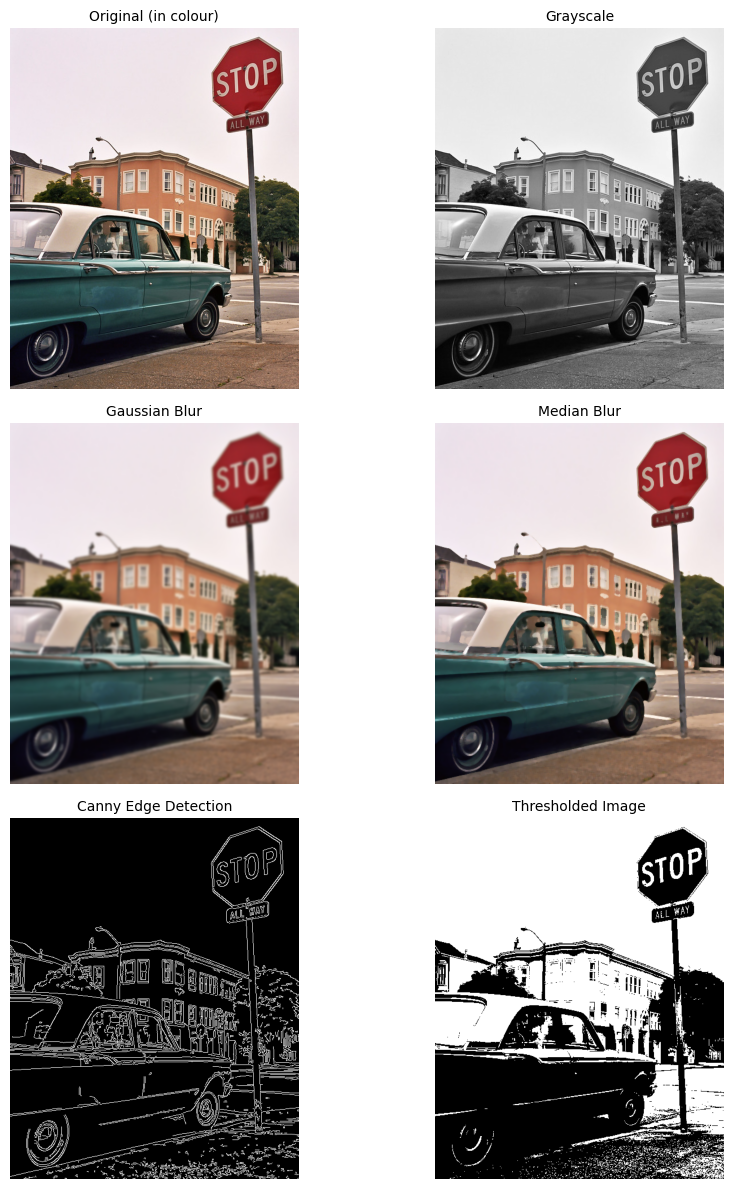

In [5]:
# Loading coco_4 image for this showcase
img = cv2.imread("sample_dataset/coco_4.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur
blurred = cv2.GaussianBlur(img_rgb, (11, 11), 0)
                    
# Median Blur
median = cv2.medianBlur(img_rgb, 5)

# Edge Detection
edges = cv2.Canny(gray, 100, 200)

# Thresholding
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

show_images_in_grid(
    [img_rgb, gray, blurred, median, edges, thresh],
    ["Original (in colour)", "Grayscale", "Gaussian Blur", "Median Blur", "Canny Edge Detection", "Thresholded Image"]
)

## 4. Morphological Operations

Morphological transformations work on binary images to clean or modify shapes:

- **Erosion** → shrinks white regions (removes noise).  
- **Dilation** → enlarges white regions (fills gaps).  
- **Contours** → trace the outlines of detected shapes.  

**Applications**: document scanning, medical imaging, shape analysis, object counting (coins, cells, seeds).


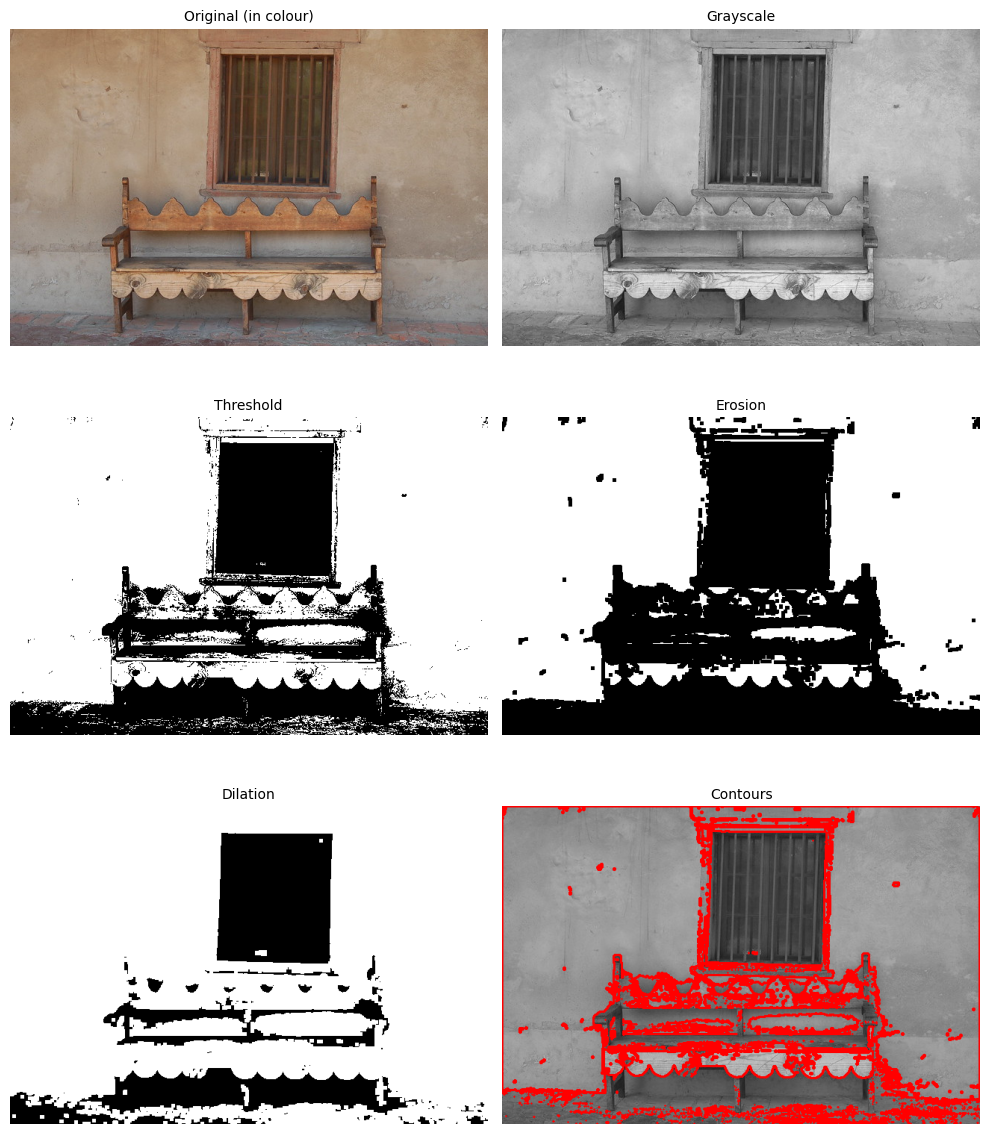

In [6]:
img = cv2.imread("sample_dataset/coco_3.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold for binary image
_, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(thresh, kernel, iterations=1)

dilation = cv2.dilate(thresh, kernel, iterations=1)

# Contours
contour_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_img, contours, -1, (255, 0, 0), 2)

show_images_in_grid(
    [img_rgb, gray, thresh, erosion, dilation, contour_img],
    ["Original (in colour)", "Grayscale", "Threshold", "Erosion", "Dilation", "Contours"]
)

## 5. Feature Detection & Matching (ORB)

**ORB (Oriented FAST and Rotated BRIEF)** detects distinctive points in an image and describes them with binary vectors:

- **Keypoints** → interesting spots (corners, blobs).  
- **Descriptors** → compact representation of the local neighborhood.  

**Applications**: image matching (e.g., panorama stitching), object recognition, AR, SLAM in robotics.

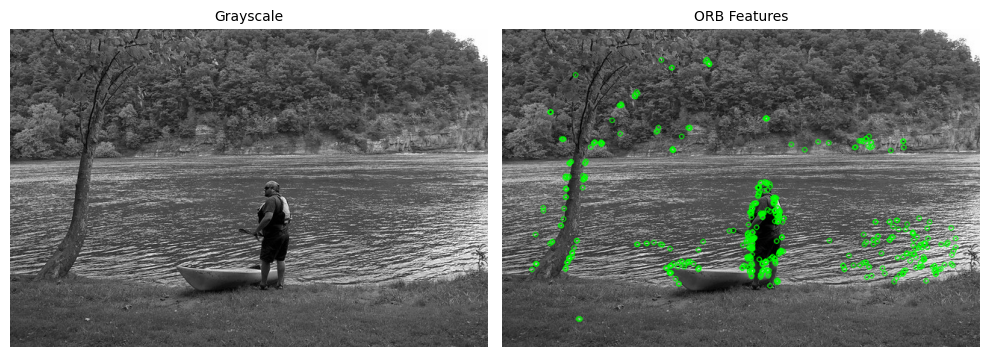

In [7]:
img = cv2.imread("sample_dataset/coco_5.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()
kp, des = orb.detectAndCompute(gray, None)

# ORB features drawn on RGB copy
feature_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
cv2.drawKeypoints(feature_img, kp, feature_img, color=(0,255,0), flags=0)

show_images_in_grid(
    [gray, feature_img],
    titles=["Grayscale", "ORB Features"]
)

## 6. Object Detection & Segmentation (GrabCut)

GrabCut separates the foreground object from the background using iterative graph cuts:

- Start with a bounding box around the object.  
- Algorithm refines the boundary using color + spatial information.  
- Produces a clean mask of the object.  

**Applications**: background removal (e-commerce, photo editing), medical segmentation, AR object extraction.


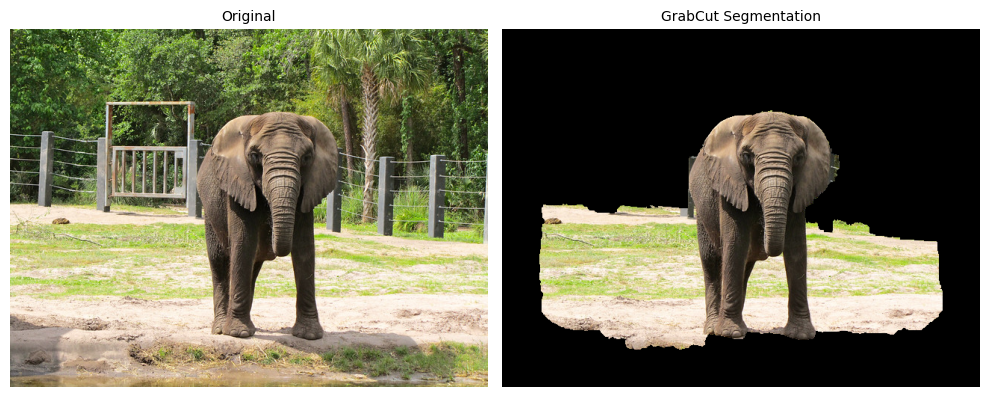

In [8]:
img = cv2.imread("sample_dataset/coco_2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (50,50,img.shape[1]-100,img.shape[0]-100)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
grabcut = img_rgb * mask2[:,:,np.newaxis]

show_images_in_grid(
    [img_rgb, grabcut],
    titles=["Original", "GrabCut Segmentation"]
)

## 7. Face Detection (Haar Cascades)

Haar Cascades are pre-trained classifiers that detect objects (like faces or eyes) in an image:

- **Frontal Face Detection** → finds upright faces.  
- Can also detect **eyes, smiles, license plates**, etc.  
- Based on Haar-like features and a cascade classifier.  

**Applications**: surveillance, face recognition pipelines, video conferencing (auto-zoom, filters), driver monitoring.



Faces detected: 11


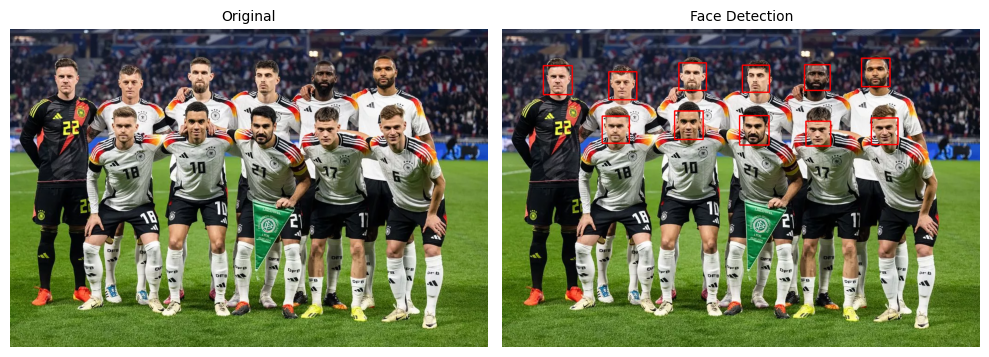

In [9]:
img = cv2.imread("sample_dataset/coco_6.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 3)

face_img = img_rgb.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,0,0), 2)

print(f"Faces detected: {len(faces)}")

show_images_in_grid(
    [img_rgb, face_img],
    titles=["Original", "Face Detection"]
)

## 8. Real-Time Webcam Showcase

Using the laptop’s webcam, we can apply OpenCV effects live:

- **None** → show raw feed.  
- **Grayscale** → convert to black & white.  
- **Gaussian Blur** → blur the feed.  
- **Canny Edges** → highlight edges.  
- **Face + Eye Detection** → draw rectangles on detected features.  

Additional functionality:
- Press **'e'** → toggle between effects.  
- Press **'s'** → save a snapshot with timestamp.  
- Press **'q'** → quit the live window.  

**Applications**: interactive demos, live filters (Snapchat/Instagram), real-time monitoring, educational tools.

In [10]:
import os
from datetime import datetime

# Ensure results directory exists
os.makedirs("results", exist_ok=True)

# Load Haar cascades for face + eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Define effects
EFFECTS = ["none", "grayscale", "blur", "edges", "face_eye"]
effect_index = 0  # start with "none"

# Open webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("❌ Error: Could not open webcam.")
else:
    print("✅ Press 'e' to toggle effects | 's' to save frame | 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame.")
        break

    effect = EFFECTS[effect_index]
    output = frame.copy()

    # Apply selected effect
    if effect == "grayscale":
        output = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        output = cv2.cvtColor(output, cv2.COLOR_GRAY2BGR)  # keep 3 channels for display

    elif effect == "blur":
        output = cv2.GaussianBlur(frame, (21, 21), 0)

    elif effect == "edges":
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 100, 200)
        output = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    elif effect == "face_eye":
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(output, (x, y), (x+w, y+h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = output[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    # Show effect name on frame
    cv2.putText(output, f"Effect: {effect}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    # Display window
    cv2.imshow("OpenCV Live Showcase", output)

    # Key controls
    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):  # quit
        break
    elif key == ord('e'):  # toggle effect
        effect_index = (effect_index + 1) % len(EFFECTS)
    elif key == ord('s'):  # save frame
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"results/{effect_index}.{effect}_{timestamp}.jpg"
        cv2.imwrite(filename, output)
        print(f"💾 Saved {filename}")

# Release resources
cap.release()
cv2.destroyAllWindows()

✅ Press 'e' to toggle effects | 's' to save frame | 'q' to quit.


# 🎯 Key Takeaways

In this tutorial, we explored the diverse functionality of **OpenCV**:

- Learned how to transform images using grayscale, HSV, resizing, and flipping  
- Applied filters and edge detection to highlight structures  
- Used morphological operations to clean and analyze shapes  
- Detected and described features with ORB  
- Performed object segmentation with GrabCut  
- Implemented face and eye detection using Haar Cascades  
- Built a real-time webcam demo with multiple interactive effects  

### 🚀 Next Steps
This project forms a solid foundation for more advanced computer vision applications such as:
- Object tracking and motion detection  
- Image classification with deep learning  
- Augmented reality (AR) applications  
- Real-time surveillance and monitoring  

Mastering these building blocks helps in working and developing full-fledged **computer vision solutions**.  
